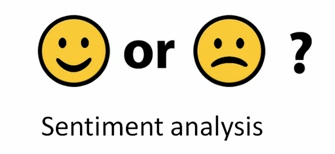

# Natural Language Processing or NLP is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages.

# If you like it, please upvote

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load the Datasets
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [ ]:
# First 5 row for train dataset
train.head()

In [ ]:
# First 5 row for test dataset
test.head()

In [ ]:
print(f"Train dataset shape {train.shape}")
print(f"Test dataset shape {test.shape}")

In [ ]:
print(f"Null value for train dataset: {train.isna().sum()}")
print("--------------------")
print(f"Null value for train dataset: {test.isna().sum()}")

In [ ]:
# Function for drop columns

def drop_col(trainORtest, col_name):
    trainORtest.drop(col_name, axis=1, inplace=True)

In [ ]:
# drop unnecessary column

drop_col(train, "keyword")
drop_col(train, "location")

drop_col(test, "keyword")
drop_col(test, "location")

In [ ]:
text_message = train["text"]
print(text_message)

# Text processing

In [ ]:
def clean_data(name):
    # Replace email addresses with 'email'
    processed = name.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    processed = processed.str.replace(r'£|\$', 'moneysymb')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumbr')

    # Replace numbers with 'numbr'
    processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    processed = processed.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    processed = processed.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    processed = processed.str.replace(r'^\s+|\s+?$', '')

    # change words to lower case - Hello, HELLO, hello are all the same word
    processed = processed.str.lower()
    
    return processed

In [ ]:
clean_train = clean_data(train["text"])
clean_test = clean_data(test["text"])

# The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

clean_train = clean_train.apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

clean_test = clean_test.apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

In [ ]:
clean_train

# Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

clean_train = clean_train.apply(lambda x:" ".join([ps.stem(word) for word in x.split()]))

clean_test = clean_test.apply(lambda x:" ".join([ps.stem(word) for word in x.split()]))

In [ ]:
clean_train

# Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word. Text preprocessing includes both Stemming as well as Lemmatization.

# Applications of lemmatization are:

*      Used in comprehensive retrieval systems like search engines.
*      Used in compact indexing


In [ ]:
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()

clean_train = clean_train.apply(lambda x:" ".join([wl.lemmatize(word) for word in x.split()]))

clean_test = clean_test.apply(lambda x:" ".join([wl.lemmatize(word) for word in x.split()]))

In [ ]:
clean_test

In [ ]:
train["text"] = clean_train
test["text"] = clean_test

In [ ]:
# Spliting train and test set

from sklearn.model_selection import train_test_split

seed = 42

X = train.text
y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [ ]:
# some important libraries

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# accuracy score function

def acc_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
   
    print("-"*30)
    
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    
    print("-"*30)
    
    return accuracy

In [ ]:
# some model and their performance

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "Bernouli", "PassiveAggressiveClassifier",
     "Naive Bayes", "SVC"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(),
    MultinomialNB(),
    BernoulliNB(),
    PassiveAggressiveClassifier(max_iter=50),
    SVC(kernel="linear")
]
    
zipped_clf = zip(names, classifiers)
tvec = TfidfVectorizer()
    
def compare_clf(classifier=zipped_clf, vectorizer=tvec, n_features=10000, ngram_range=(1, 1)):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n, c in classifier:
        checker_pipeline = Pipeline([
            ("vectorizer", vectorizer),
            ("classifier", c)
        ])
        clf_acc = acc_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        print("Model result for {}".format(n))
        print(c)
        result.append((n, clf_acc))
    return result

In [ ]:
trigram_result = compare_clf()

In [ ]:
trigram_result

In [ ]:
# prediction

def prediction(pipeline, testtext):
    sentiment_fit = pipeline.fit(X_train,y_train)
    y_pred = sentiment_fit.predict(testtext)
    
    return y_pred

# Implement the best model

In [ ]:
# Use TfidfVectorizer
# use of pipeline
vectorizer=TfidfVectorizer()
checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', LogisticRegression())
        ])
vectorizer.set_params(stop_words=None, max_features=100000, ngram_range=(1,4))
prediction=prediction(checker_pipeline,test['text'])

In [ ]:
prediction

In [ ]:
'''
index = test.id
newFrame = pd.DataFrame({"id":index, "target":prediction})
newFrame.to_csv("realnot.csv", index=False)
'''

# If you Like, please upvote